In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data/realistic_linear_regression_dataset.csv")
df.head()

,ProductCategory,Region,CustomerSegment,IsPromotionApplied,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,SalesRevenue
0,Furniture,East,High Income,Yes,536.051521,189.277811,1.159611,220.831351,4.035607,146.225757,52,2293.143707
1,Toys,West,High Income,No,352.701361,255.921497,1.545366,467.217175,4.106804,104.261304,35,1640.454368
2,Electronics,South,High Income,No,618.989105,277.399353,1.671902,363.623261,4.021775,77.220752,44,2173.086023
3,Furniture,West,Middle Income,Yes,339.959644,153.557699,1.408244,209.853621,4.148890,128.277455,15,1672.608857
4,Furniture,West,Middle Income,Yes,477.951385,155.814478,2.177301,274.859950,4.913782,111.309643,61,2443.222482


In [17]:
num_col = ["ProductionCost", "MarketingSpend", "SeasonalDemandIndex", "CompetitorPrice", "CustomerRating", "EconomicIndex", "StoreCount", "SalesRevenue"]

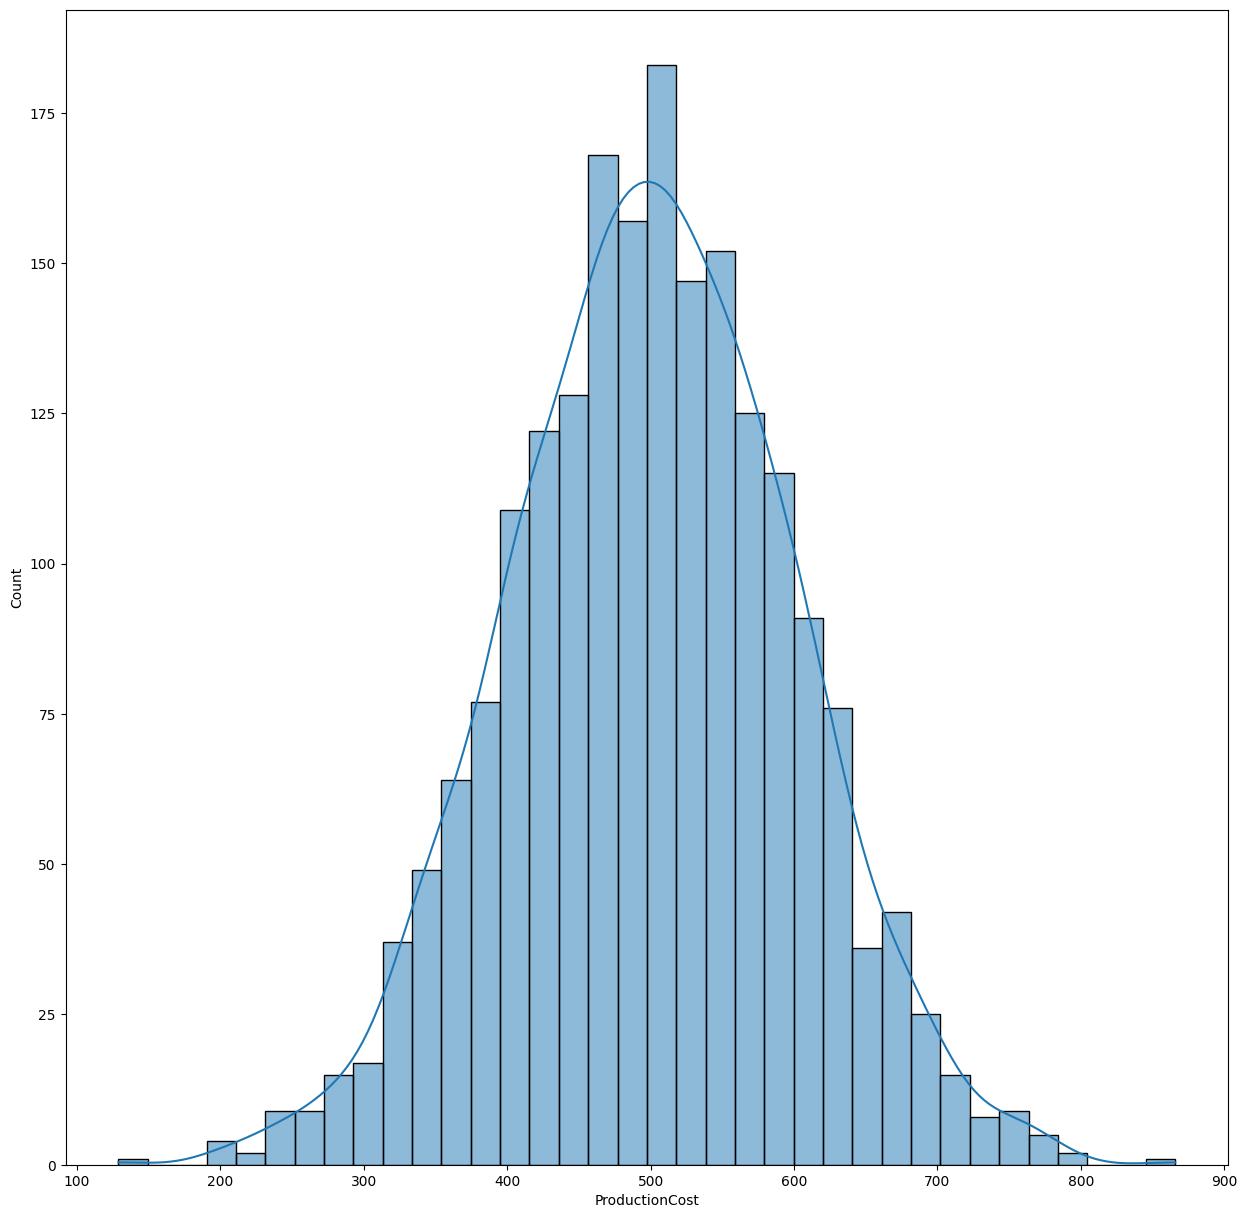

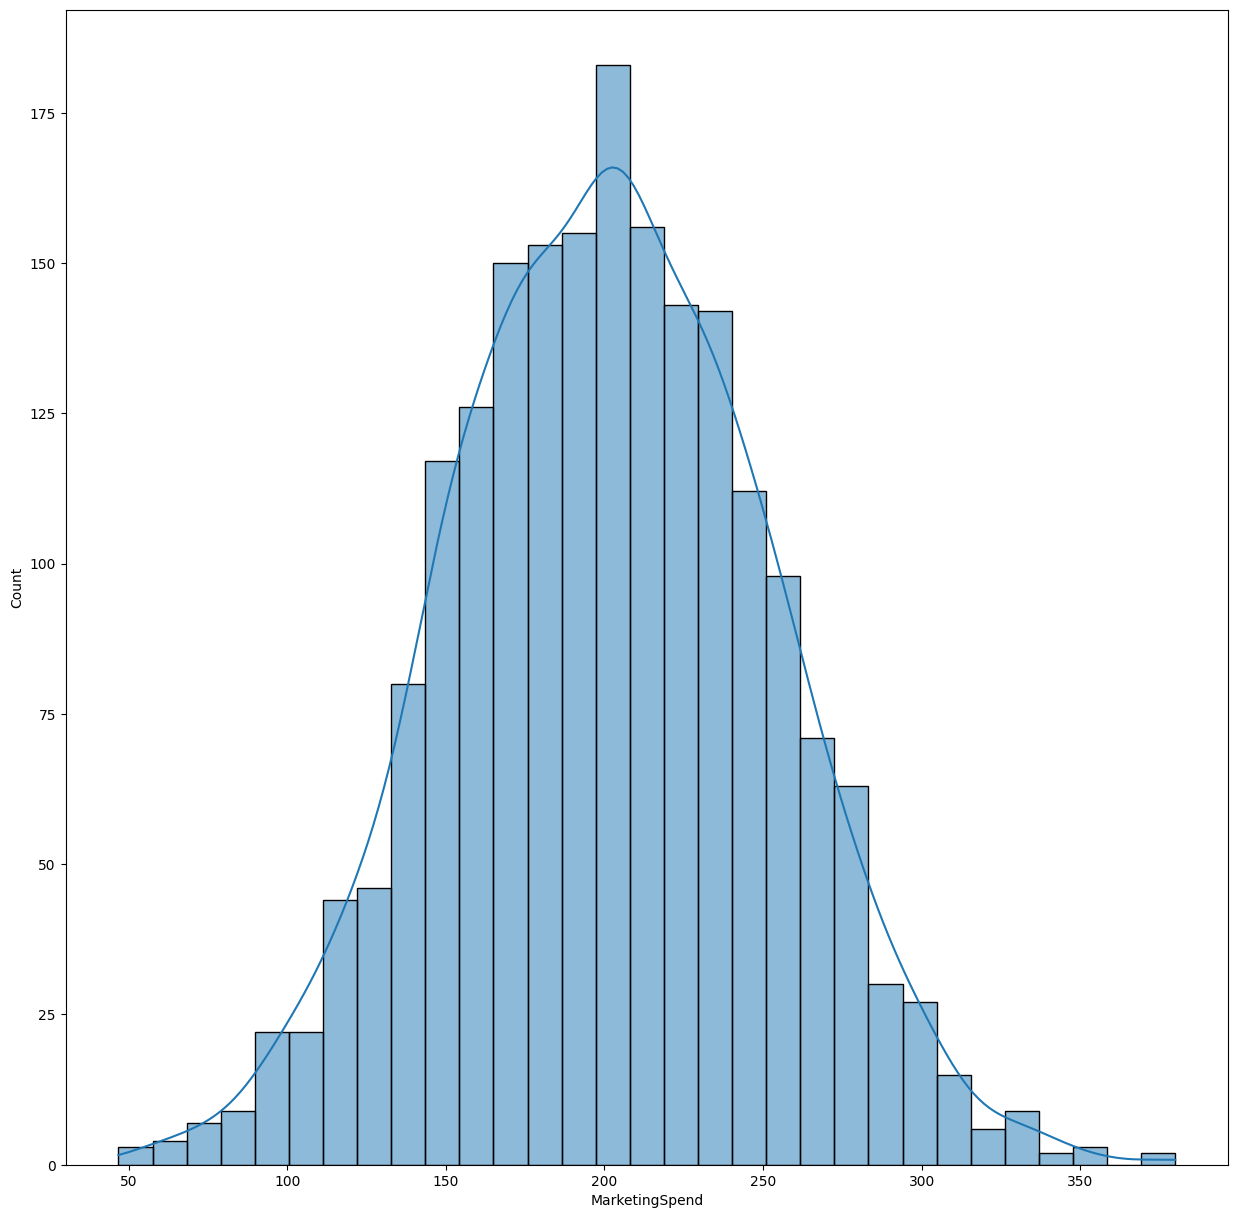

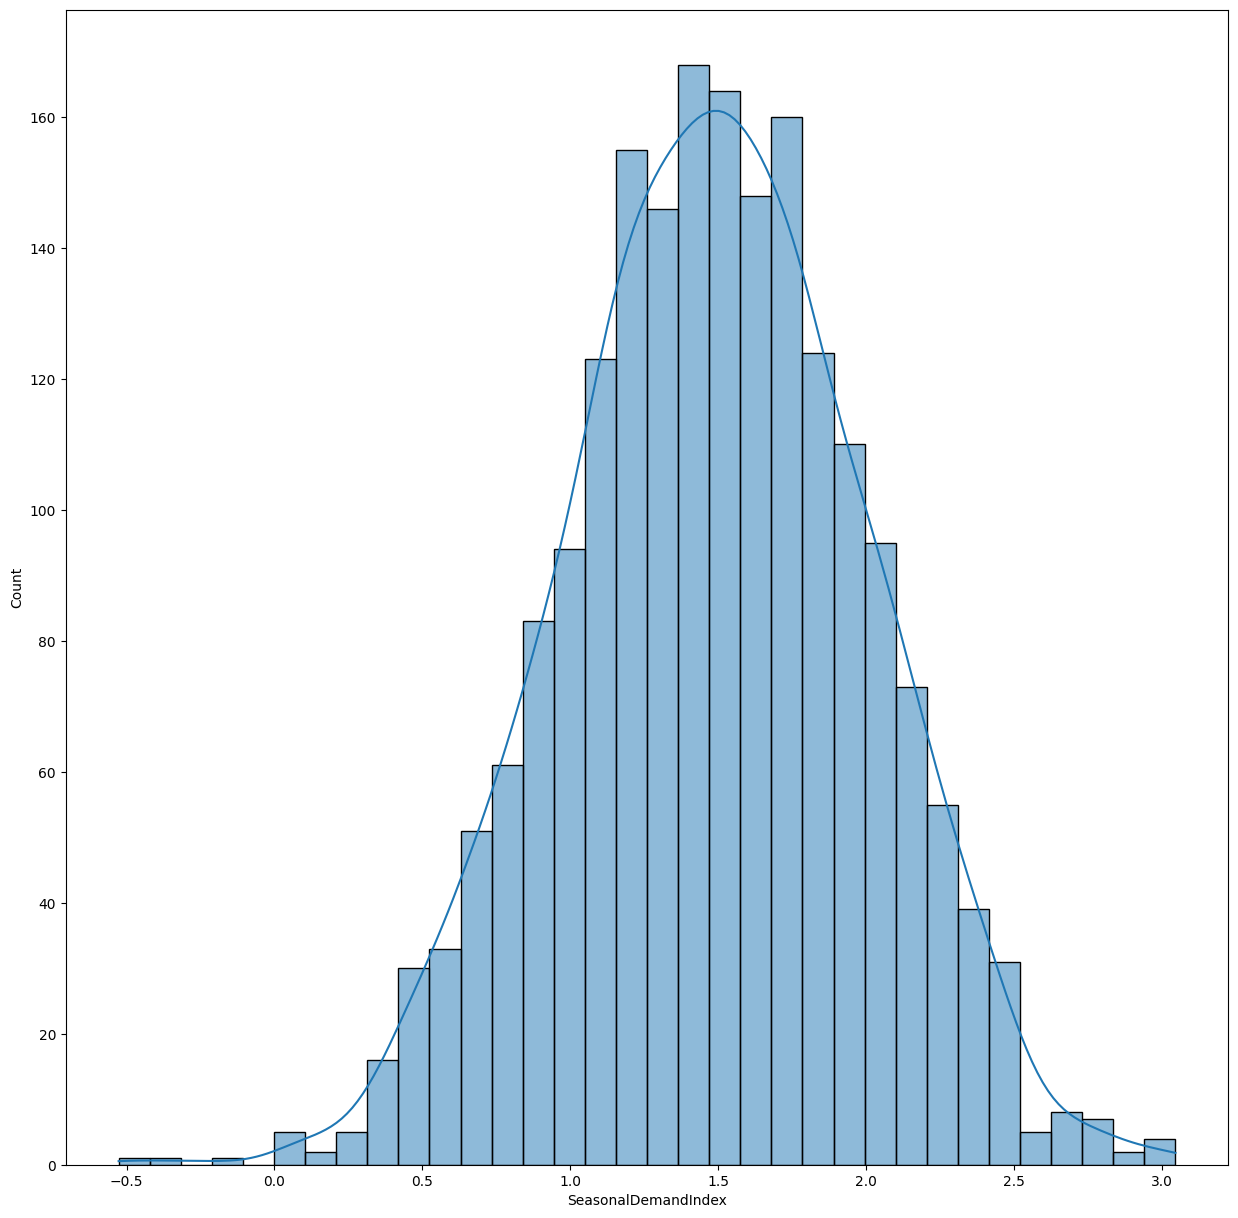

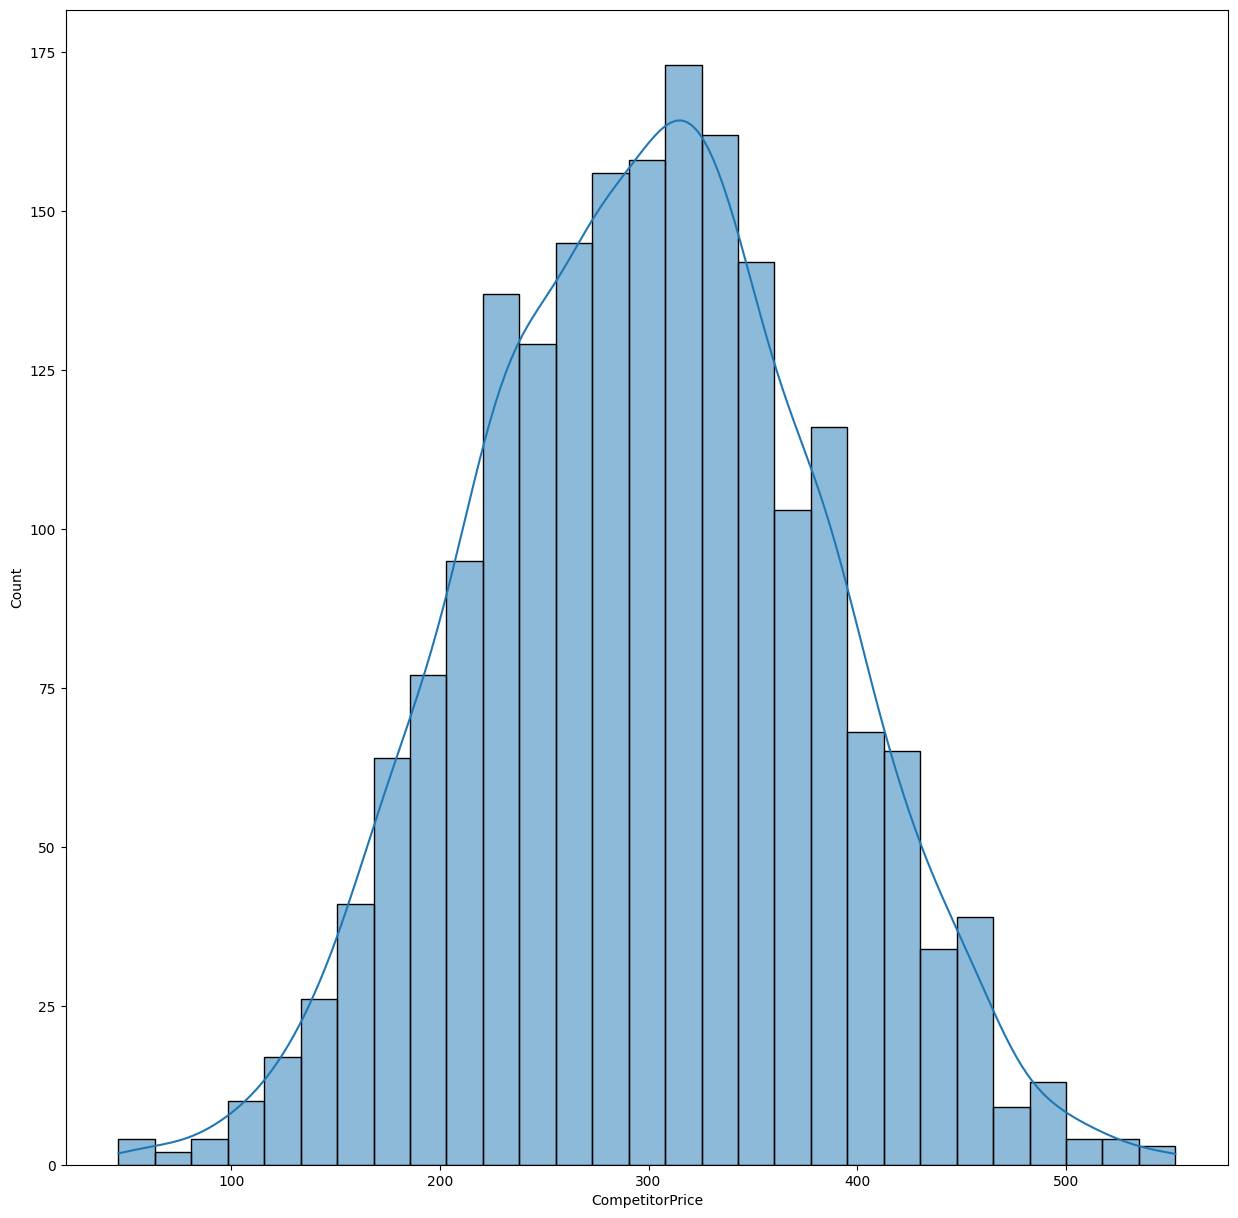

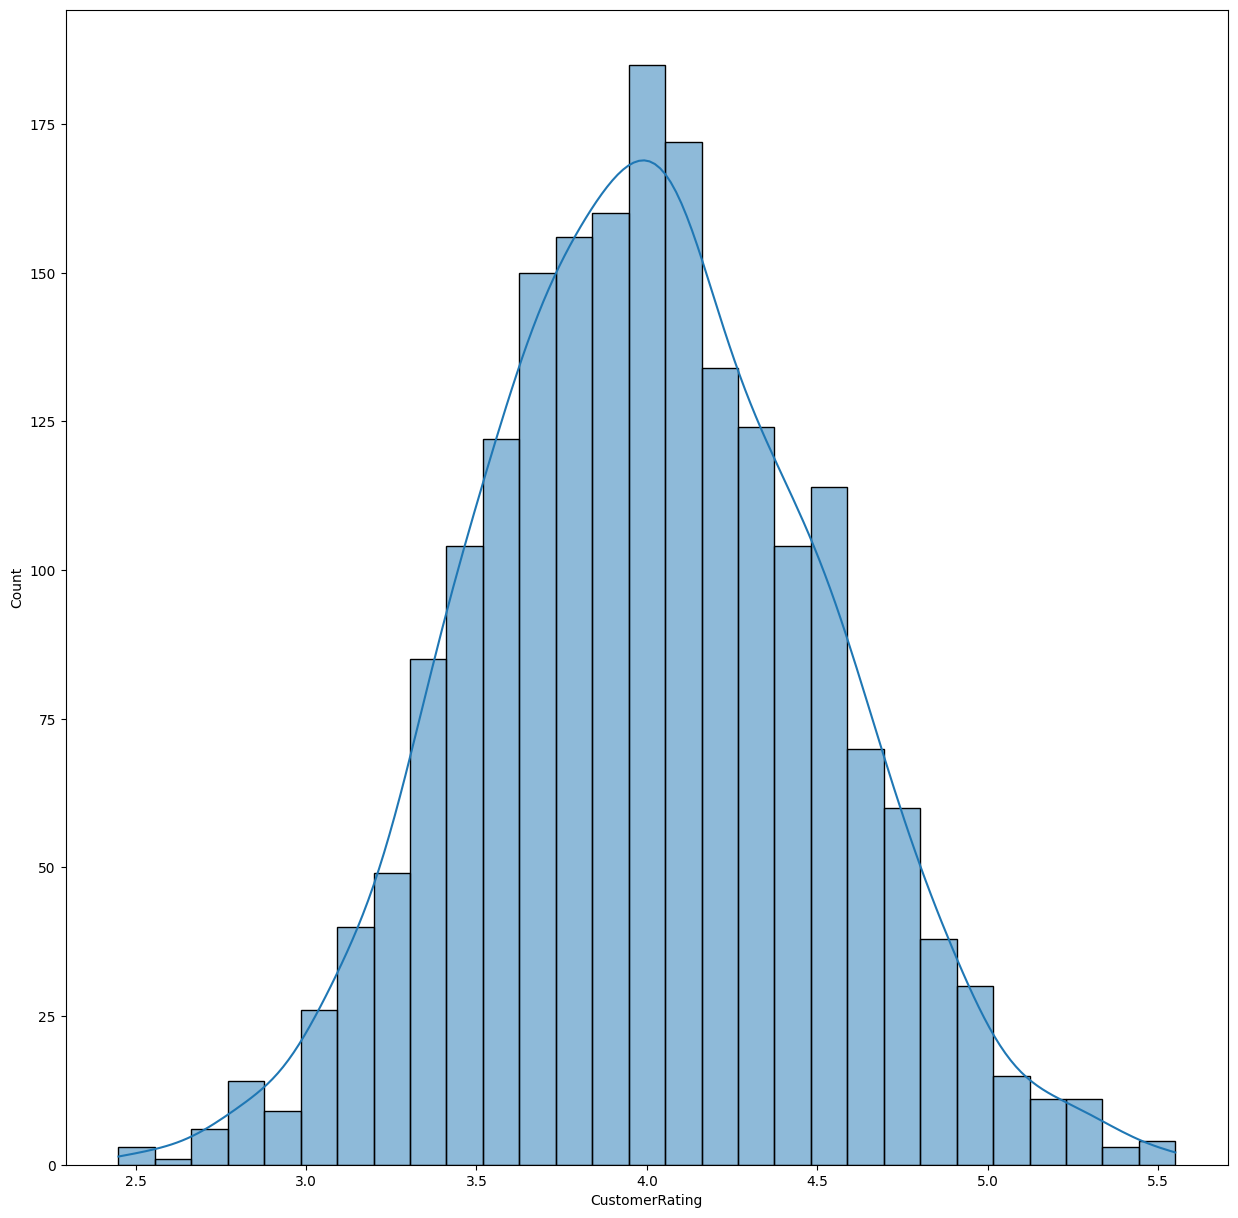

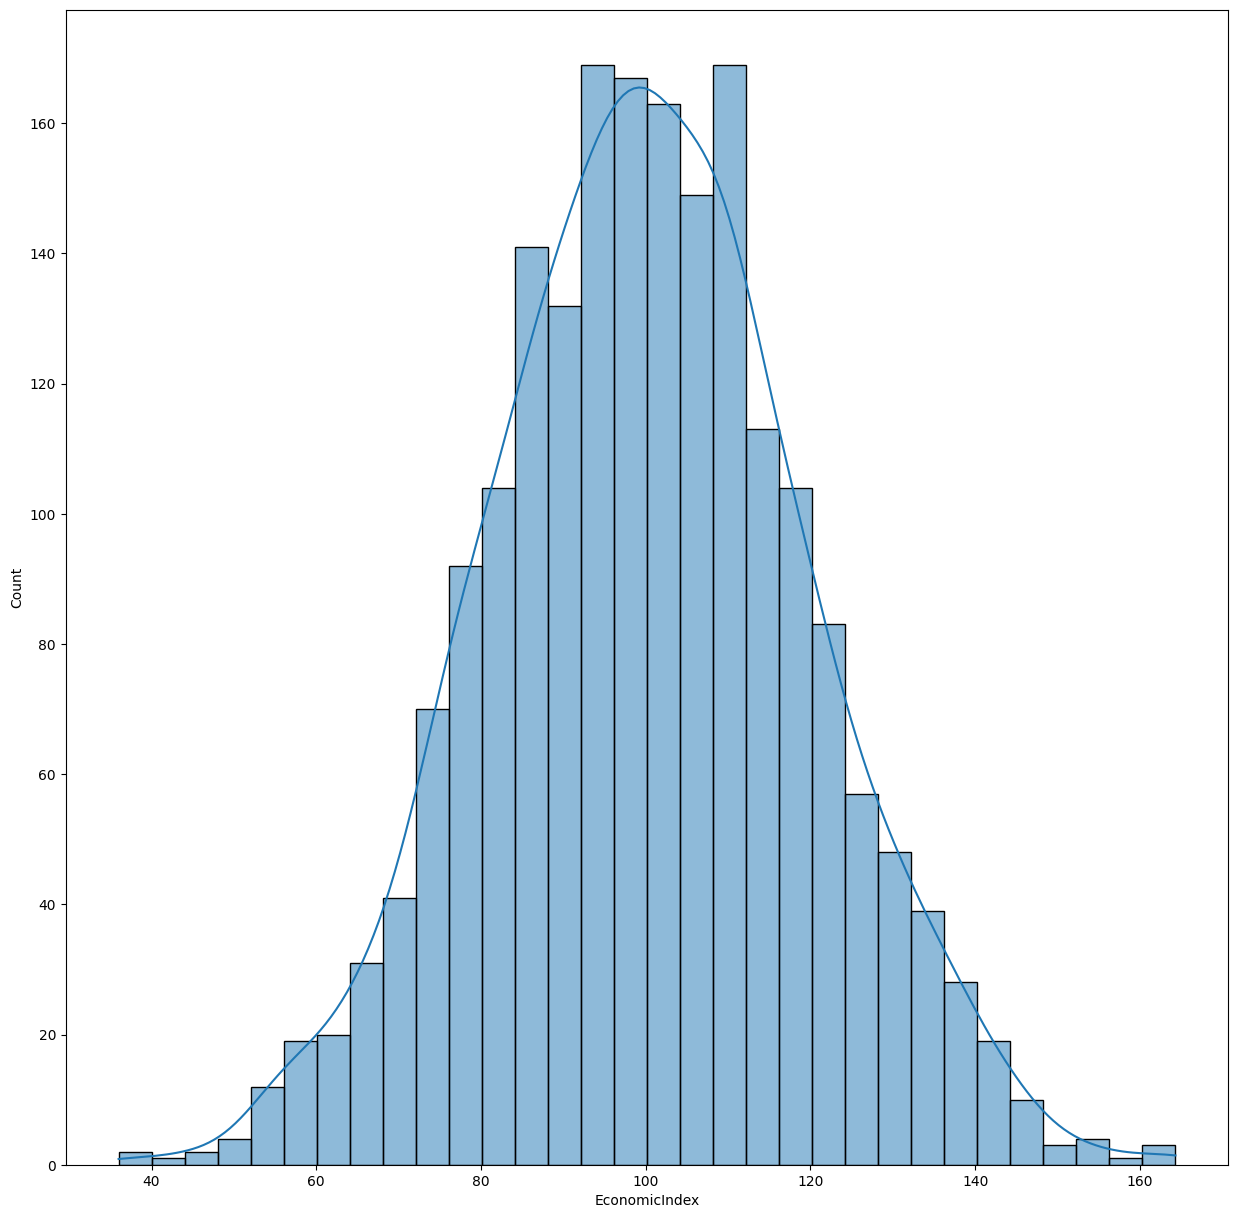

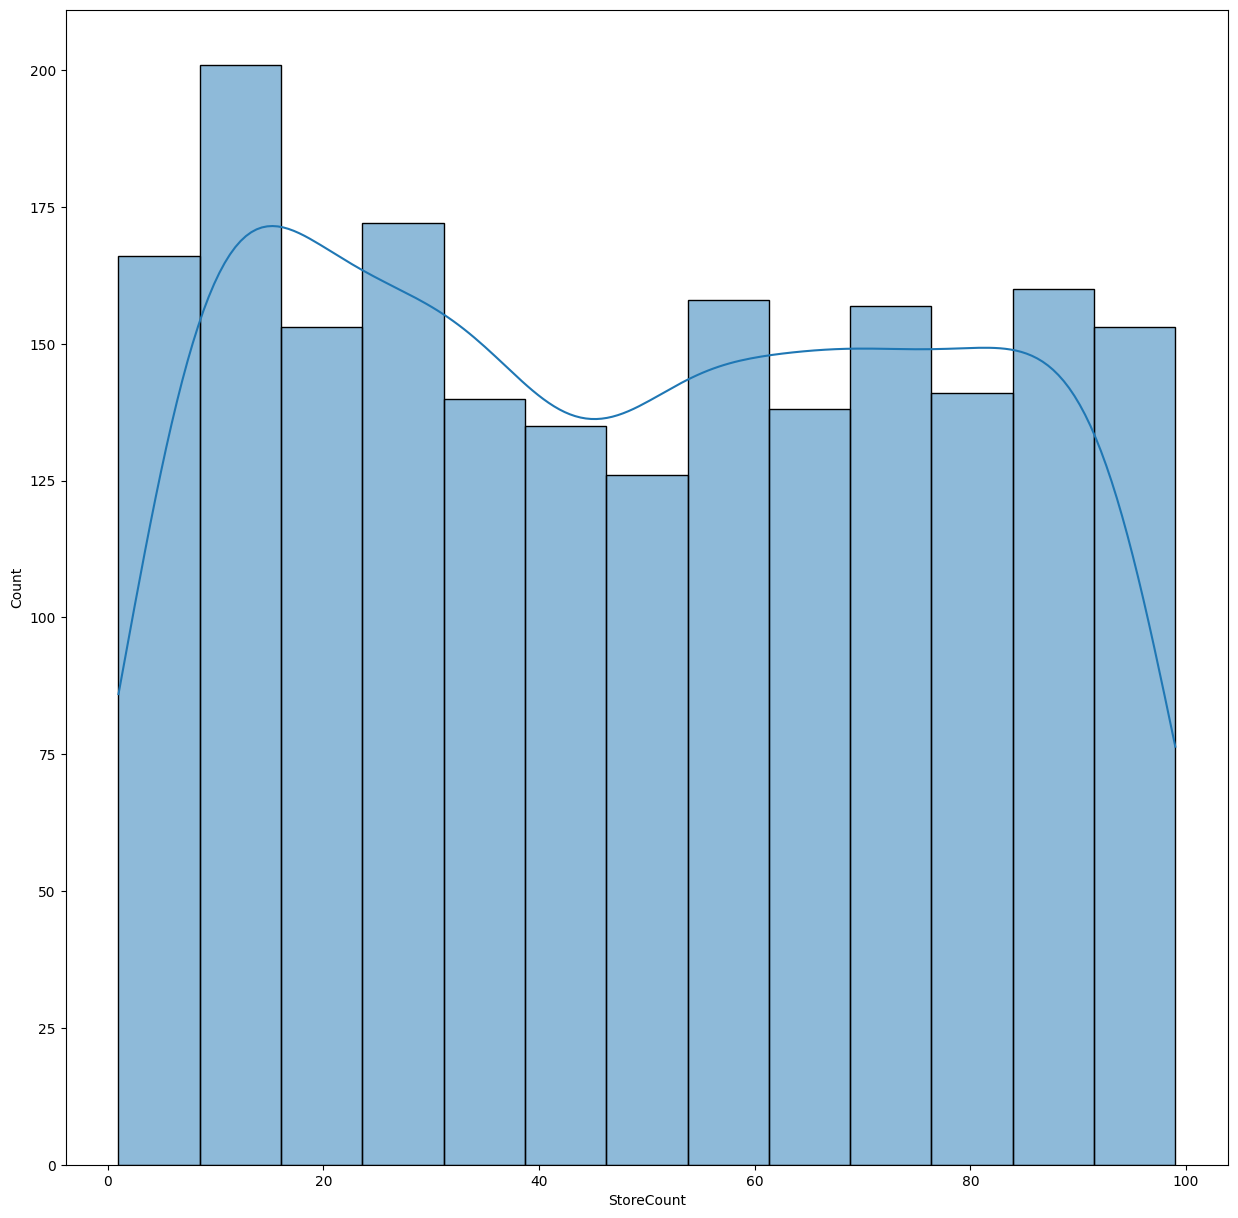

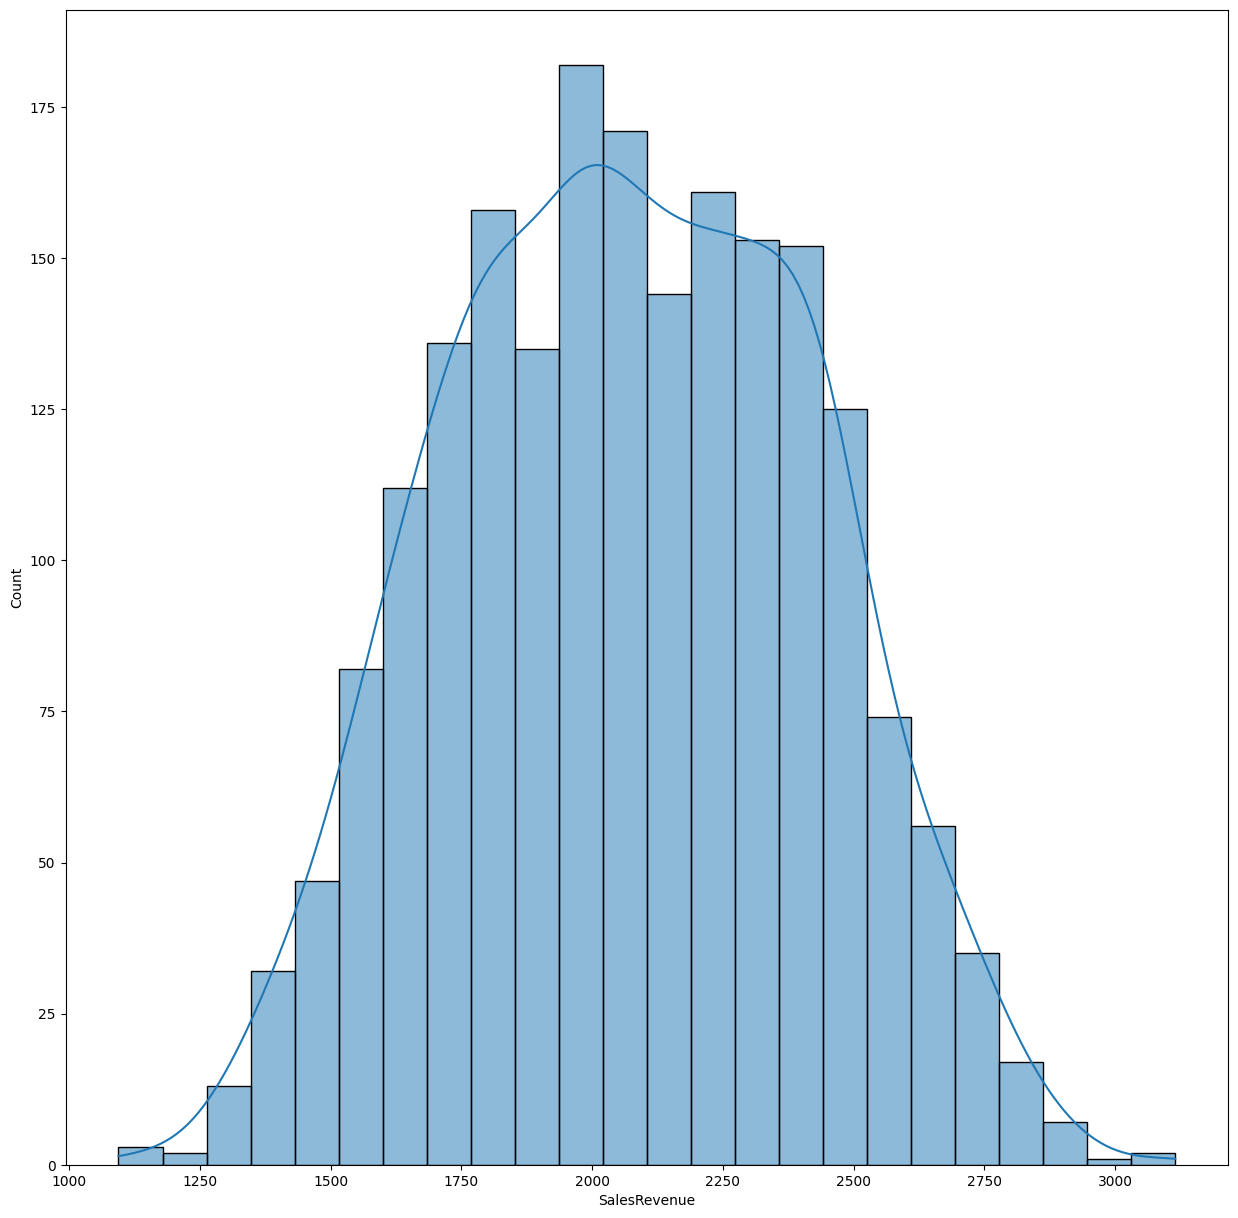

In [4]:
for col in num_col:
    fig = plt.figure(figsize = (15,15))
    sns.histplot(df[col], kde = True)
    plt.show()

In [5]:
num_col = df[["ProductionCost", "MarketingSpend", "SeasonalDemandIndex", "CompetitorPrice", "CustomerRating", "EconomicIndex", "StoreCount", "SalesRevenue"]]

<function matplotlib.pyplot.show(close=None, block=None)>

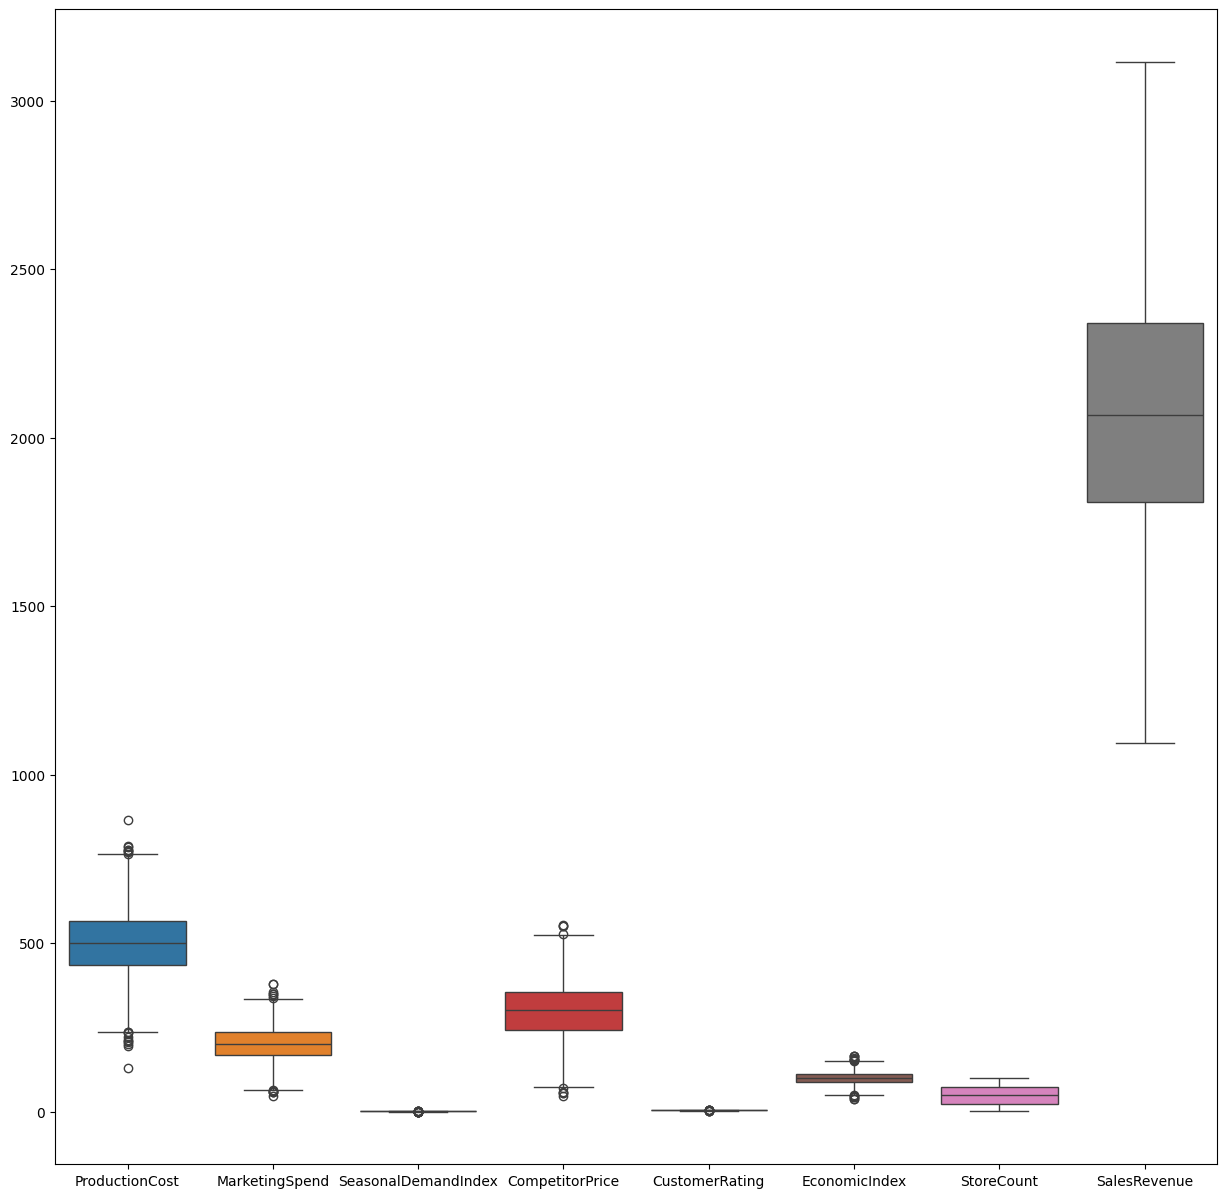

In [6]:
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(num_col,ax = ax)
plt.show

In [7]:
category_col = ["ProductCategory", "Region", "CustomerSegment", "IsPromotionApplied"]

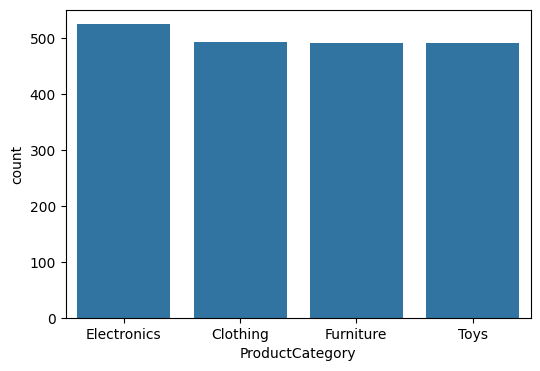

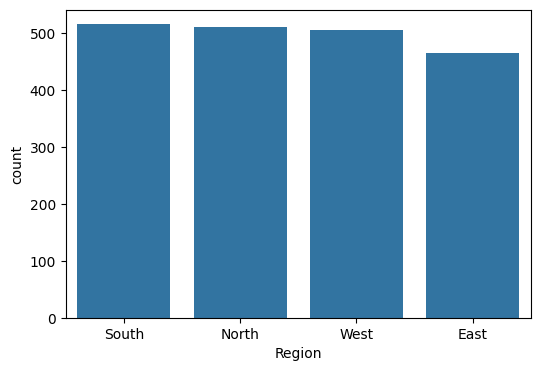

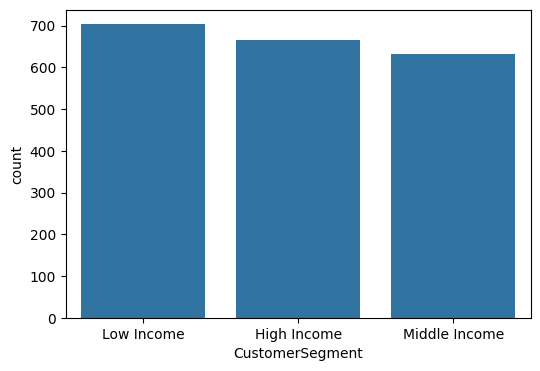

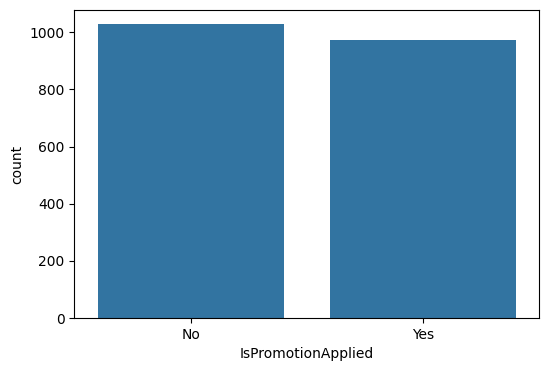

In [8]:
for col in category_col:
    plt.figure(figsize=(6,4))
    sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index
    )
    plt.show()

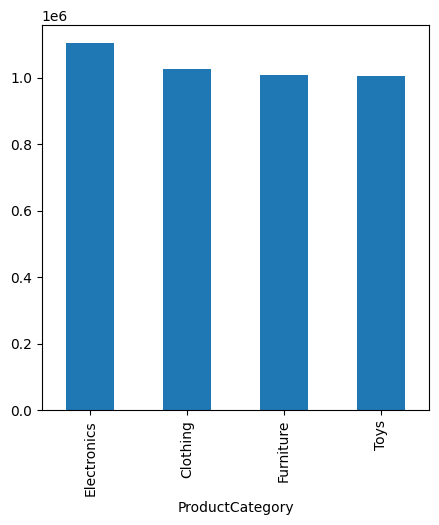

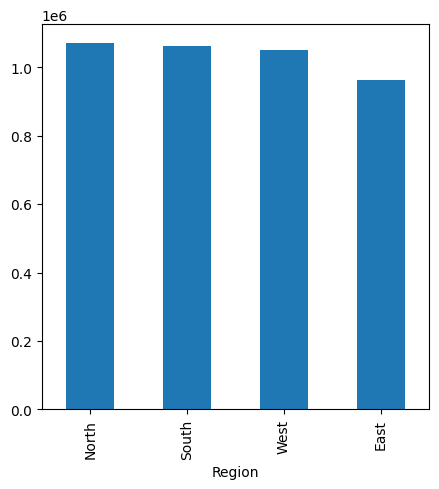

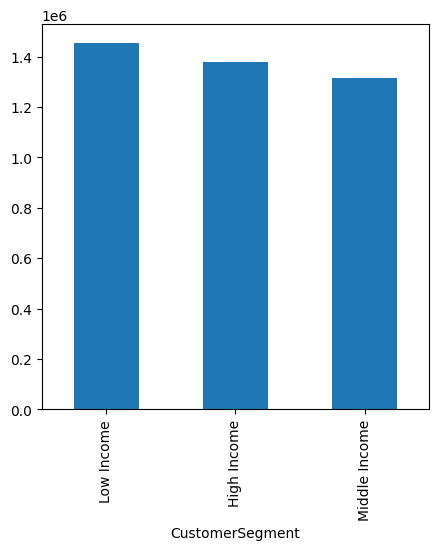

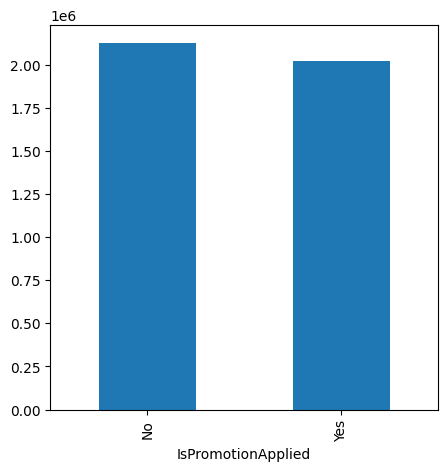

In [9]:
for col in category_col:
    revenue_by_category = (df.groupby(col)["SalesRevenue"].sum().sort_values(ascending=False).head(10))
    plt.figure(figsize = (5,5))
    revenue_by_category.plot(kind = 'bar')
    plt.show()

<Figure size 1500x1500 with 0 Axes>

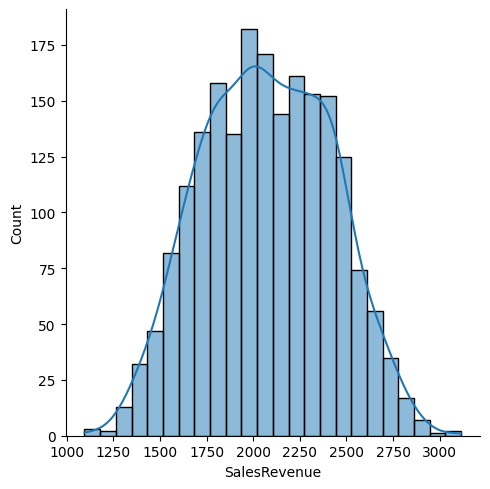

In [10]:
fig= plt.figure(figsize = (15,15))
sns.displot(df["SalesRevenue"],kde = True)
plt.show()

In [11]:
revenue_impact_category_col = ["ProductCategory", "Region", "IsPromotionApplied"]

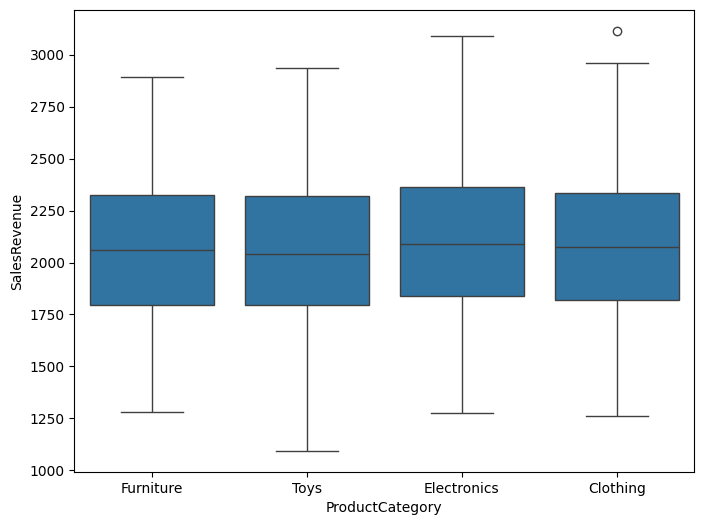

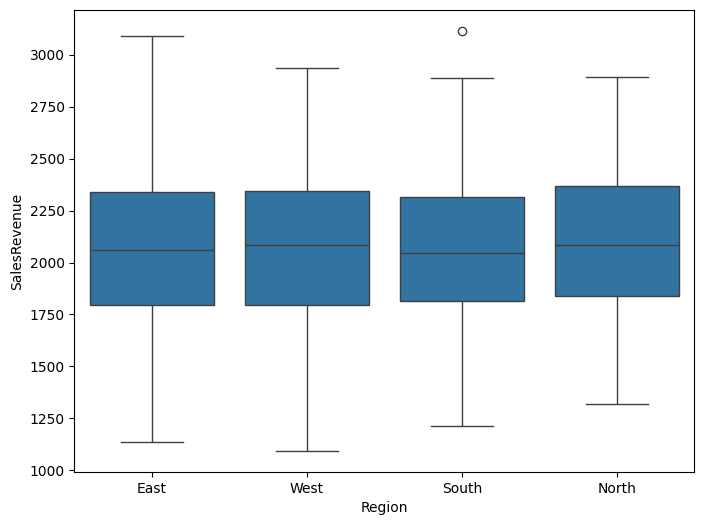

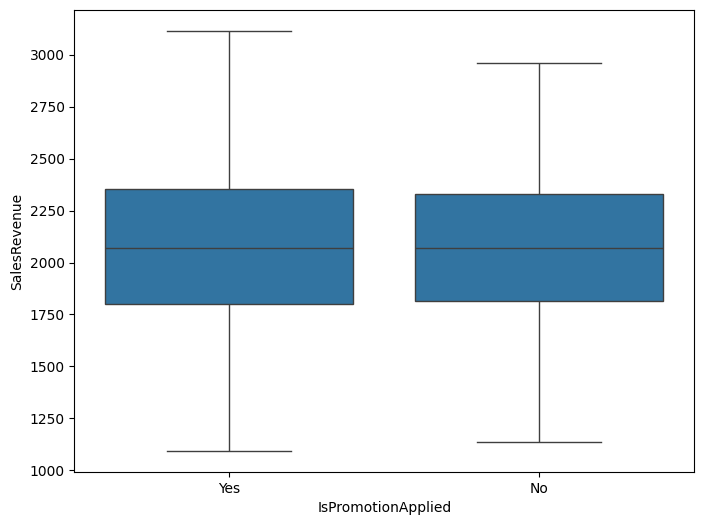

In [12]:
for col in revenue_impact_category_col:
    plt.figure(figsize = (8,6))
    sns.boxplot(data = df, x = col, y ="SalesRevenue")
    plt.show()

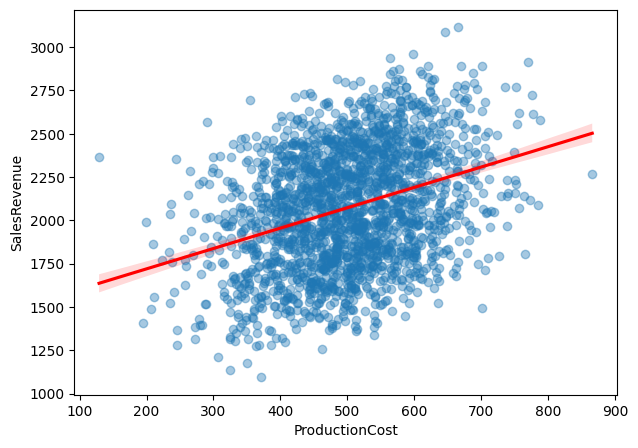

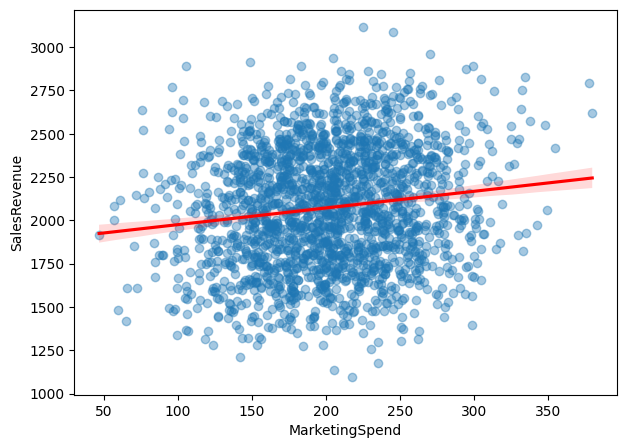

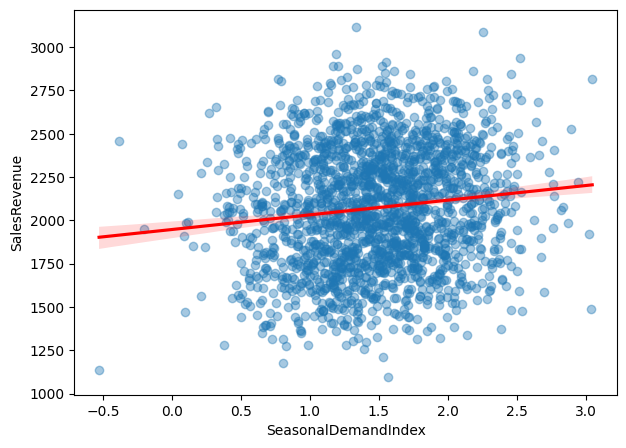

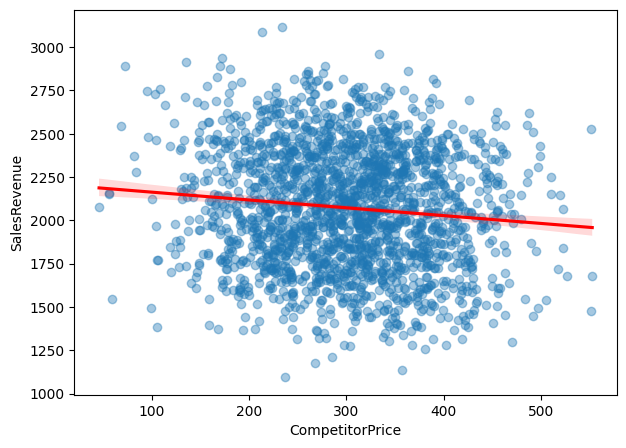

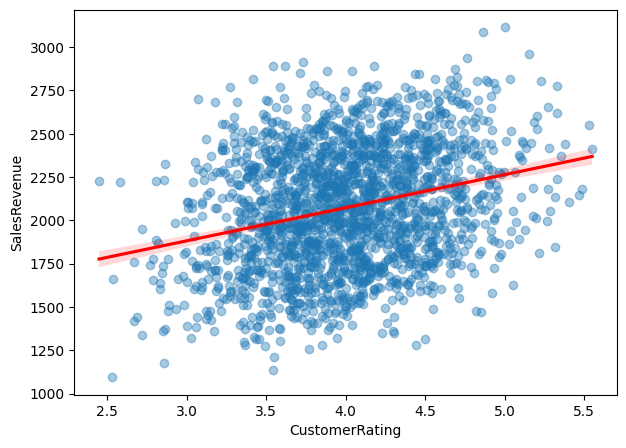

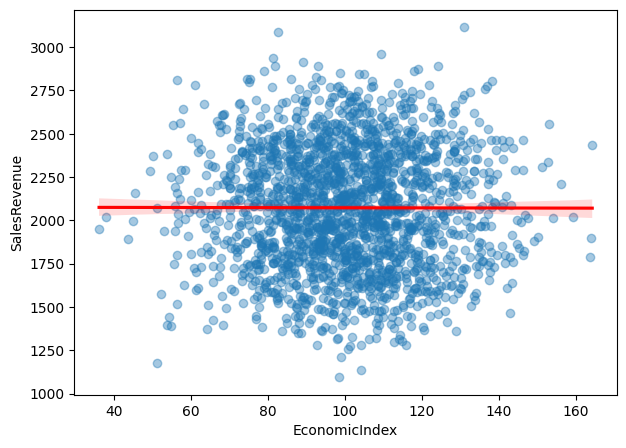

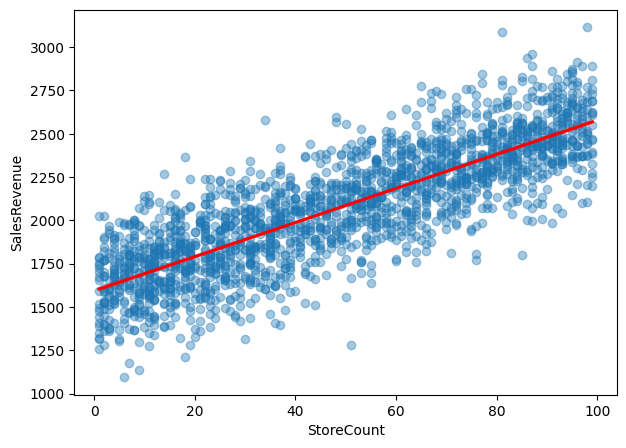

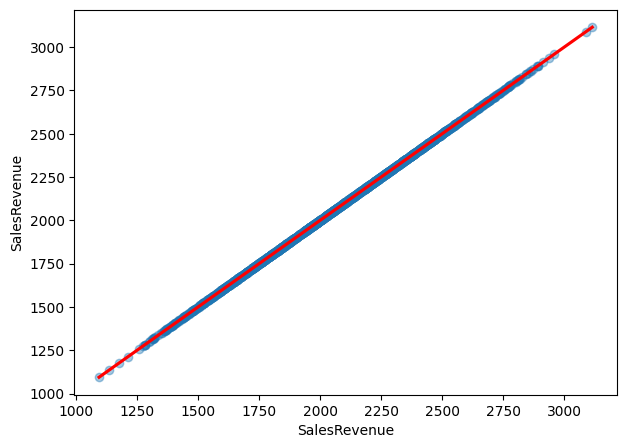

In [13]:
for col in num_col:
    plt.figure(figsize = (7,5))
    sns.regplot(data = df, x = col, y = "SalesRevenue", scatter_kws = {'alpha':0.4},line_kws= {'color':'red'})
    plt.show()

In [14]:
promotion_stats = (
    df.groupby("IsPromotionApplied")["SalesRevenue"]
      .agg(["mean", "median", "count"])
      .reset_index()
)

promotion_stats


,IsPromotionApplied,mean,median,count
0,No,2068.232303,2068.173855,1028
1,Yes,2077.749067,2067.491207,972


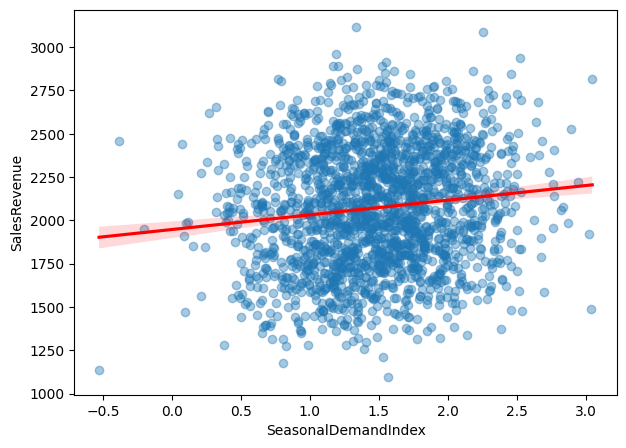

In [15]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=df,
    x="SeasonalDemandIndex",
    y="SalesRevenue",
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "red"}
)
plt.show()

<Axes: >

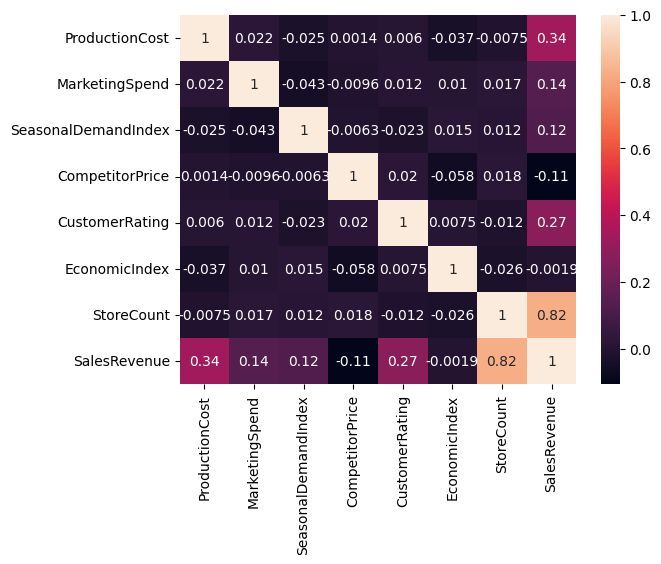

In [18]:
sns.heatmap(df[num_col].corr(), annot = True)